#Import Packages

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#Load Data

In [ ]:
#Load predictions
ann_prob = np.load('ANN.npy')
xgb_prob = np.load('XGB.npy')
svm_prob = np.load('SVM.npy')
#Load test data
ytest_ml = np.load('y_test_ml.npy')
ytest_dl = np.load('y_test_dl.npy')

#ROC

Text(0.5, 1.0, 'ROC curve')

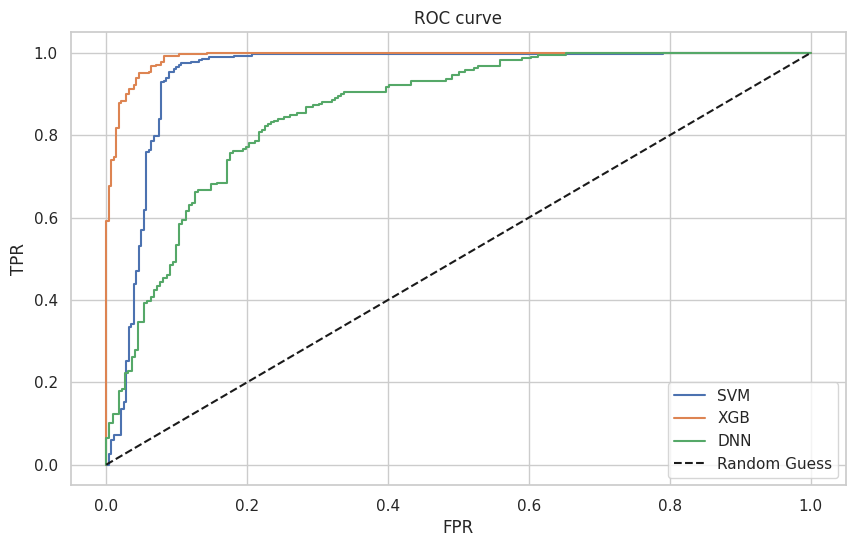

In [ ]:
#Calculate ROC and AUC
#XGB
xgb_fpr, xgb_tpr, xgb_thres = roc_curve(ytest_ml, xgb_prob)
xgb_auc = roc_auc_score(ytest_ml, xgb_prob)
#SVM
svm_fpr, svm_tpr, svm_thres = roc_curve(ytest_ml, svm_prob)
svm_auc = roc_auc_score(ytest_ml, svm_prob)
#ANN
ann_fpr, ann_tpr, ann_thres = roc_curve(ytest_dl, ann_prob)
ann_auc = roc_auc_score(ytest_dl, ann_prob)

#Plot ROC
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(style='whitegrid')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(xgb_fpr, xgb_tpr, label='XGB')
plt.plot(ann_fpr, ann_tpr, label='DNN')
plt.plot([0,1],[0,1], 'k--', label='Random Guess')
#Label the plot
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best")
plt.title("ROC curve")

#Accuracy

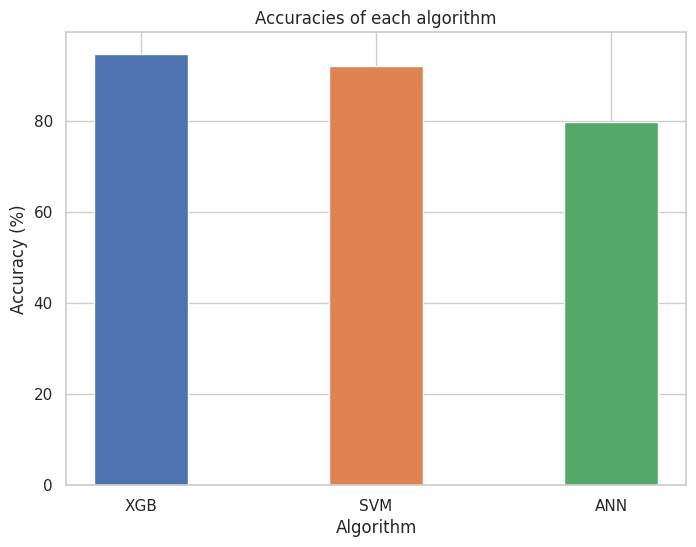

In [ ]:
#Calculate Accuracy
svm_acc = accuracy_score(ytest_ml,(svm_prob>0).astype(int))
xgb_acc = accuracy_score(ytest_ml,(xgb_prob>0.5).astype(int))
ann_acc = accuracy_score(ytest_dl, np.squeeze(ann_prob >0.5).astype(int))

#Plot accuracy
x = np.arange(3)
y1 = [xgb_acc*100,svm_acc*100, ann_acc*100]
width = 0.4
plt.figure(figsize=(8,6), dpi=100)
plt.bar(x, y1, width, color=['C0','C1','C2'])
#Label the plot
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.title('Accuracies of each algorithm')
plt.xticks(x, ['XGB','SVM', 'ANN']);

#AUC

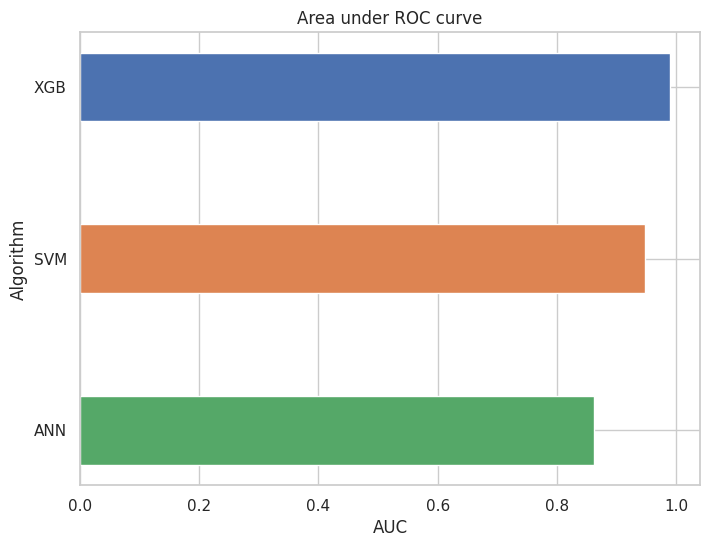

In [ ]:
#Plot AUC
x = np.arange(3)
y1 = [ann_auc,svm_auc, xgb_auc]
width = 0.4
plt.figure(figsize=(8,6), dpi=100)
plt.barh(x, y1, width, color=['C2','C1','C0'])
#Label the plot
plt.xlabel("AUC")
plt.ylabel("Algorithm")
plt.title('Area under ROC curve')
plt.yticks(x, ['ANN','SVM', 'XGB']);